# DQN

## Add gradient clipping and log transforms on rewards

In [3]:
from DDQN import DDQN
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ddqn = DDQN(npatients=10,device=device) #epsilon=.15
ddqn.niter = 10
r,s,a = ddqn.train()

/content/drive/My Drive/ISAE/2021-2022/hiv_experiment/DDQN.py:35: UserWarning: This overload of addcmul is deprecated:
	addcmul(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcmul(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)
  update = torch.addcmul(R,self.gamma,1-D,QS2max)


mean reward over tested patients =  6677047.843907171
mean reward over tested patients =  3186157.882248269
mean reward over tested patients =  12517268.224822428
mean reward over tested patients =  11595343.980780335
mean reward over tested patients =  12517268.224822428
mean reward over tested patients =  6677047.843907171
mean reward over tested patients =  6677047.843907171
mean reward over tested patients =  6260341.485920301
mean reward over tested patients =  6677047.843907171
mean reward over tested patients =  6677047.843907171


6.400914781013812
-5.102307514719219


4.6754314366538585

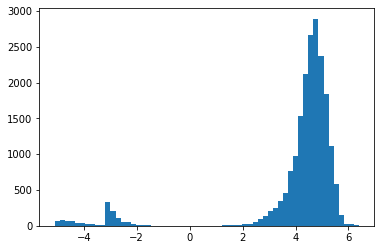

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Rewards distribution
rews = ddqn.buffer.rewards
print(np.max(rews))
print(np.min(rews))
n,x,_ = plt.hist(rews,bins=60)
x[n.argmax()]

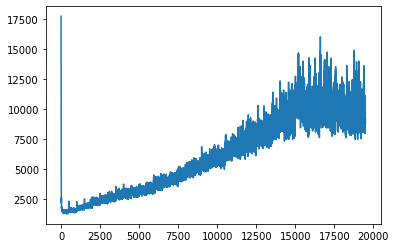

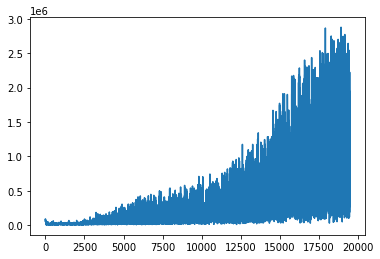

In [5]:
# Plot losses 
nlosses = len(ddqn.losses)
losses = [ddqn.losses[i].cpu().detach().numpy() for i in range(nlosses)]
plt.plot(losses)
plt.show()

# Plot total parameteres norm before clipping 
ngradients = len(ddqn.gradients)
gradients = [ddqn.gradients[i].cpu().detach().numpy() for i in range(ngradients)]
plt.plot(gradients) 
plt.show()

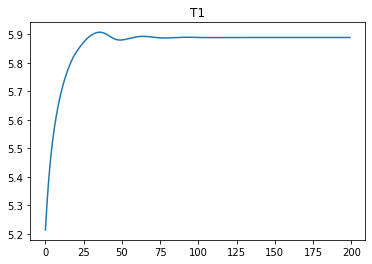

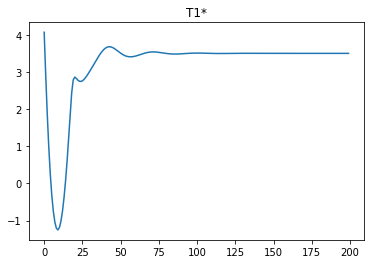

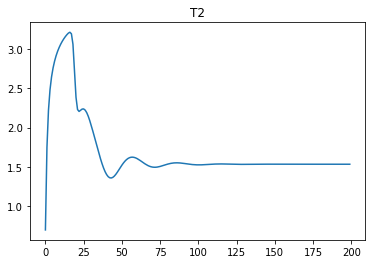

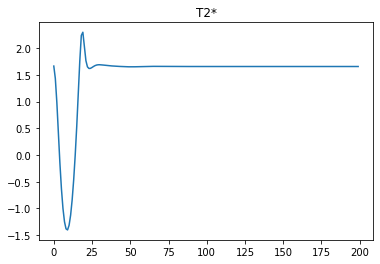

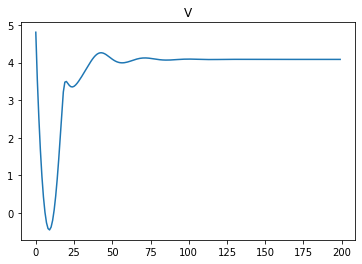

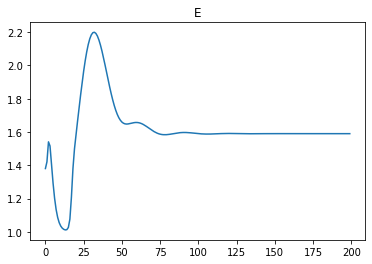

In [6]:
state_labels = ['T1','T1*','T2','T2*','V','E']
for i in range(len(state_labels)):
    plt.plot([t for t in range(200)],np.log10(s[-1][:,i]))
    plt.title(state_labels[i])
    plt.show()